In [ ]:
#Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/mtcars.csv") # membaca file csv yang akan di analysis
df.head() #menampilkan 5 baris pertama dalam file csv

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.isnull().sum() #mengetahui jumlah data NaN

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [ ]:
df.info() #mengetahui karakteristik dari data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
df.shape #menampilkan jumlah baris dan kolom

(32, 12)

In [ ]:
df.describe() #menampilkan simpulan statistik dari data mulai dari total per kolom sampai nilai max 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
df.columns #menampilkan nama kolom yang ada

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [ ]:
df["cyl"].unique()

array([6, 4, 8])

In [ ]:
df["disp"].unique()

array([160. , 108. , 258. , 360. , 225. , 146.7, 140.8, 167.6, 275.8,
       472. , 460. , 440. ,  78.7,  75.7,  71.1, 120.1, 318. , 304. ,
       350. , 400. ,  79. , 120.3,  95.1, 351. , 145. , 301. , 121. ])

In [ ]:
correlations = df.corr() #mengetahui korelasi antar data

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

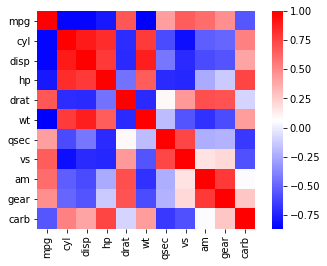

In [ ]:
sns.heatmap(data = correlations, square = True, cmap = "bwr")
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

In [ ]:
df[["cyl", "disp"]].groupby(["cyl"]).describe().unstack()

             cyl
disp  count  4       11.000000
             6        7.000000
             8       14.000000
      mean   4      105.136364
             6      183.314286
             8      353.100000
      std    4       26.871594
             6       41.562460
             8       67.771324
      min    4       71.100000
             6      145.000000
             8      275.800000
      25%    4       78.850000
             6      160.000000
             8      301.750000
      50%    4      108.000000
             6      167.600000
             8      350.500000
      75%    4      120.650000
             6      196.300000
             8      390.000000
      max    4      146.700000
             6      258.000000
             8      472.000000
dtype: float64

In [ ]:
df[["cyl", "disp"]].corr()

,cyl,disp
cyl,1.000000,0.902033
disp,0.902033,1.000000


In [ ]:
X = df[["cyl"]].values

y = df[["disp"]].values

In [ ]:
from sklearn.model_selection import train_test_split #import library untuk membagi data
from sklearn.linear_model import LinearRegression #import library liner regression
lr = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1) #membagi data training 90% dan 10% test
lr.fit(x_train, y_train)

print("coef : ", lr.coef_) 
print("Intercept : ", lr.intercept_)
print("Scor :", lr.score(x_test,y_test))


coef :  [[62.09490501]]
Intercept :  [-154.26476684]
Scor : 0.9884227835605405


In [ ]:
y_predict1 = lr.predict(x_test)
for x in range(len(y_predict1)):
  print(y_predict1[x], x_test[x], y_test[x])


[342.49447323] [8] [351.]
[342.49447323] [8] [360.]
[94.1148532] [4] [108.]
[94.1148532] [4] [79.]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor #import library model mechine learning KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10) 
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
y_predict2 = knn.predict(x_test)

In [ ]:
for x in range(len(y_predict2)):
  print(y_predict2[x], x_test[x], y_test[x])

[330.04] [8] [351.]
[330.04] [8] [360.]
[111.45] [4] [108.]
[111.45] [4] [79.]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
print("r2_score", r2_score(y_test, y_predict2))
print("MSE : ", mean_squared_error(y_predict2,y_test))

r2_score 0.9652437855437378
MSE :  600.4570499999995


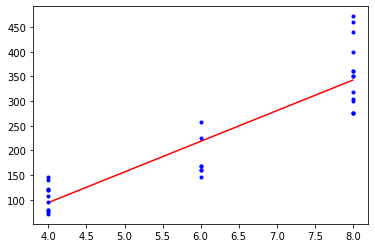

In [ ]:
plt.plot(x_test, y_predict1, "r-")
plt.plot(X, y, "b.")
plt.show()

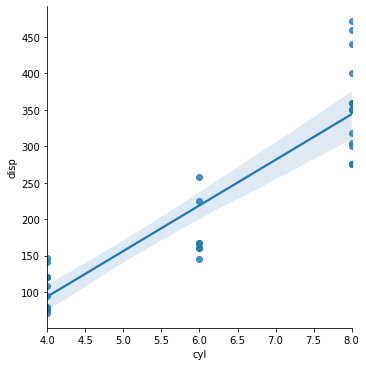

In [ ]:
sns.lmplot( y = "disp" , x = "cyl"  , data = df)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 

In [ ]:
R_forest = RandomForestRegressor( n_estimators=100,
                                 criterion = 'mse',
                                 random_state = 1,
                                 n_jobs = -1)

R_forest.fit(x_train, y_train)
y_train_pred = R_forest.predict(x_train)
y_test_pred = R_forest.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print("r2_score : ", r2_score(y_train, y_train_pred))

r2_score :  0.8118106798674696


In [ ]:
print("r2_score : ", r2_score(y_test, y_test_pred))

r2_score :  0.9878292344970464
